In [1]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import joblib
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

In [5]:
%store -r X_relative_footsteps_acc
%store -r Y_relative_footsteps_acc
print(X_relative_footsteps_acc.shape)
print(Y_relative_footsteps_acc.shape)

(8103, 28)
(8103, 8)


# Multivariate Linear Regression (Foot prediction)

In [6]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [7]:
# Entries where RL swings
idxs = np.where(X_relative_footsteps_acc[:, 23] == 1)[0]
X_relative_footsteps_acc_RL_swing = X_relative_footsteps_acc[idxs]
Y_relative_footsteps_acc_RL_swing = Y_relative_footsteps_acc[idxs]

## Predict RL foot -> x

In [8]:
X_relative_footsteps_acc_RL_swing[0, :]

array([ 0.        ,  0.        ,  0.        ,  0.0291372 ,  0.14719469,
        0.02297609,  0.00390969,  0.00879887, -0.0143033 ,  0.22920228,
        0.1869078 , -0.40553803,  0.22966338, -0.20612911, -0.40550052,
       -0.26193804,  0.13096712, -0.40069671, -0.25670755, -0.15245044,
       -0.4004477 ,  0.        ,  1.        ,  1.        ,  0.        ,
        0.        ,  0.        , -0.1       ])

In [9]:
X_relative_footsteps_acc_RL_swing[0, :]

array([ 0.        ,  0.        ,  0.        ,  0.0291372 ,  0.14719469,
        0.02297609,  0.00390969,  0.00879887, -0.0143033 ,  0.22920228,
        0.1869078 , -0.40553803,  0.22966338, -0.20612911, -0.40550052,
       -0.26193804,  0.13096712, -0.40069671, -0.25670755, -0.15245044,
       -0.4004477 ,  0.        ,  1.        ,  1.        ,  0.        ,
        0.        ,  0.        , -0.1       ])

### Linear Regression

In [12]:
# Input
X = np.hstack((X_relative_footsteps_acc_RL_swing[:, :3], # prev velocity command
               X_relative_footsteps_acc_RL_swing[:, -3:], # commanded velocity command
               X_relative_footsteps_acc_RL_swing[:, 9:11], # FL (x,y) position
               X_relative_footsteps_acc_RL_swing[:, 12:14], # FR (x,y) position
               X_relative_footsteps_acc_RL_swing[:, 15:17], # RL (x,y) position
               X_relative_footsteps_acc_RL_swing[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_acc_RL_swing[:, 4]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_rl_relative_swinging_x = LinearRegression()

# Fit the model
model_rl_relative_swinging_x.fit(X_train, Y_train)

# Predict
predictions = model_rl_relative_swinging_x.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9483676986343292
RMSE:  0.006178703781188272
The lowest error is:  6.045852871172652e-06
The highest error is:  0.038713338967779454
The avg. error is:  0.0034194430855535567


In [13]:
model_rl_relative_swinging_x.coef_

array([[-2.18450989e-02, -2.54404570e-02,  5.49528538e-02,
         1.05624061e-01,  3.52491756e-04,  1.79183797e-02,
        -1.61539686e-01,  2.00457563e-02,  1.34424793e-01,
         7.13177027e-02,  2.38673369e-01,  4.38534939e-02,
         4.79844544e-01,  2.57851818e-01]])

In [14]:
model_rl_relative_swinging_x.intercept_

array([-0.01985522])

Text(0, 0.5, 'Predictions')

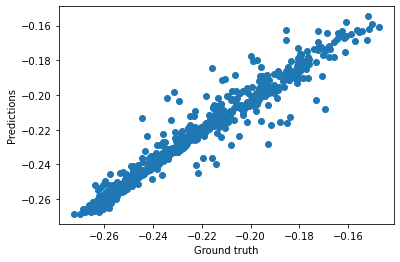

In [15]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [16]:
#%store model_rl_relative_swinging_x

In [17]:
#for idx, prediction in enumerate(predictions):
#    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [18]:
# Save model
#joblib.dump(model_rl_relative_swinging_x, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_rl_relative_swinging_x.sav")

### Predict RL foot -> y

In [30]:
# Input
X = np.hstack((X_relative_footsteps_acc_RL_swing[:, :3], # prev velocity command
               X_relative_footsteps_acc_RL_swing[:, -3:], # commanded velocity command
               X_relative_footsteps_acc_RL_swing[:, 9:11], # FL (x,y) position
               X_relative_footsteps_acc_RL_swing[:, 12:14], # FR (x,y) position
               X_relative_footsteps_acc_RL_swing[:, 15:17], # RL (x,y) position
               X_relative_footsteps_acc_RL_swing[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_acc_RL_swing[:, 5]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_rl_relative_swinging_y = LinearRegression()

# Fit the model
model_rl_relative_swinging_y.fit(X_train, Y_train)

# Predict
predictions = model_rl_relative_swinging_y.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9460955776079008
RMSE:  0.005059415117710458
The lowest error is:  2.0051069410387257e-07
The highest error is:  0.03943192693621189
The avg. error is:  0.002819556611449107


In [31]:
model_rl_relative_swinging_y.coef_

array([[-0.00772958, -0.00228094, -0.00710435,  0.00050274,  0.1056016 ,
        -0.03909717,  0.19374105,  0.14851831, -0.07317351, -0.00656907,
         0.10253546,  0.49562984, -0.10257232,  0.02033087]])

In [32]:
model_rl_relative_swinging_y.intercept_

array([0.03512298])

Text(0, 0.5, 'Predictions')

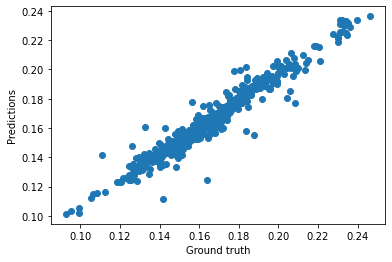

In [33]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [73]:
#%store model_rl_relative_swinging_y

In [74]:
#for idx, prediction in enumerate(predictions):
#    print(f'Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [75]:
# Save model
#joblib.dump(model_rl_relative_swinging_y, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_rl_relative_swinging_y.sav")